# Importing Dependencies

In [1]:
import warnings
warnings.filterwarnings('ignore',category=FutureWarning)
warnings.filterwarnings('ignore',category=DeprecationWarning)
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, KFold, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest
import xgboost as xgb
from sklearn.feature_selection import f_regression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import seaborn as sns
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from keras.wrappers.scikit_learn import KerasClassifier

# Data

## Features

### Input
* **TemperatureC** - Temperature in Celsius
* **DewpointC** - Dewpoint in Celsius
* **PressurehPa** - Pressure in hectopascals
* **WindSpeedKMH** - Wind speed in kilometers per hour
* **WindSpeedGustKMH** - Wind speed gust in kilometers per hour
* **Humidity** - Humidity in percent
* **dailyrainMM** - Daily rain in millimeters
* **SolarRadiationWatts_m2** - Solar radiation in watts per square meter

### Output
* **Energy** - Energy in kilowatt hours


In [2]:
data = pd.read_excel("../Dataset.xlsx", sheet_name=['Weather', 'Total Consumers'])

In [3]:
df_weather = data['Weather']
df_tc = data['Total Consumers']
df_weather

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [4]:
print(df_weather.isnull().sum())
# Drop NaN values from weather dataset
#df_weather.dropna(axis=0, inplace=True)
#df_weather.reset_index(drop=True, inplace=True)
df_weather

datetime                  22953
TemperatureC                  0
DewpointC                     0
PressurehPa                   0
WindSpeedKMH                  0
WindSpeedGustKMH              0
Humidity                      0
HourlyPrecipMM                0
dailyrainMM                   0
SolarRadiationWatts_m2        0
dtype: int64


,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
0,2019-01-01 00:15:00.000,8,4,1030,5,7,76,0,0,0
1,2019-01-01 00:30:00.000,8,4,1030,3,6,76,0,0,0
2,2019-01-01 00:45:00.000,8,4,1030,4,6,78,0,0,0
3,2019-01-01 01:00:00.000,8,4,1030,3,6,78,0,0,0
4,2019-01-01 01:15:00.000,8,4,1030,2,8,78,0,0,0
...,...,...,...,...,...,...,...,...,...,...
35034,NaN,0,0,0,0,0,0,0,0,0
35035,NaN,0,0,0,0,0,0,0,0,0
35036,NaN,0,0,0,0,0,0,0,0,0
35037,NaN,0,0,0,0,0,0,0,0,0


In [5]:
df_tc

,0,1,2,3,4,5,6,7,8,9,...,41,42,43,44,45,46,47,48,49,50
0,2.964,2.322959,1.544607,0.778310,1.962012,2.677445,0.237877,0.689194,0.358525,0.814643,...,0.898895,0.203825,0.221624,0.319531,0.830996,0.924987,0.219128,0.274880,0.990488,0.779475
1,2.584,2.371797,1.544607,0.778310,1.962012,2.733737,0.192929,0.558967,0.358525,0.660712,...,0.917793,0.165311,0.179747,0.319531,0.848467,0.944434,0.177722,0.222940,1.011313,0.795863
2,3.071,2.415961,1.319880,0.665072,1.676555,2.784640,0.382869,1.109272,0.377198,1.311186,...,0.934883,0.328060,0.356708,0.336174,0.864266,0.962019,0.352691,0.442426,1.030144,0.810682
3,2.694,2.302538,1.319880,0.665072,1.676555,2.653908,0.442052,1.280743,0.377198,1.513868,...,0.890992,0.378772,0.411848,0.336174,0.823691,0.916855,0.407209,0.510816,0.981781,0.772623
4,2.569,2.363063,0.913154,0.460128,1.159919,2.723669,0.192242,0.556976,0.668500,0.658358,...,0.914413,0.164722,0.179106,0.595793,0.845343,0.940956,0.177089,0.222146,1.007588,0.792932
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35131,1.664,2.244719,1.455982,0.733653,1.849437,2.587266,0.205654,0.595835,0.171793,0.704291,...,0.868619,0.176214,0.191602,0.153109,0.803007,0.893832,0.189444,0.237645,0.957128,0.753222
35132,1.659,2.136340,1.201186,0.605264,1.525786,2.462348,0.201219,0.582985,0.067223,0.689101,...,0.826680,0.172414,0.187470,0.059912,0.764237,0.850676,0.185359,0.232519,0.910916,0.716855
35133,1.664,2.192805,1.201186,0.605264,1.525786,2.527430,0.228585,0.662271,0.067223,0.782819,...,0.848530,0.195862,0.212966,0.059912,0.784436,0.873160,0.210568,0.264142,0.934992,0.735802
35134,1.697,1.446083,0.259545,0.130782,0.329682,1.666757,0.189302,0.548459,0.070958,0.648292,...,0.559578,0.162203,0.176368,0.063241,0.517310,0.575820,0.174381,0.218749,0.616596,0.485237


In [6]:
df_energy = df_tc.sum(axis=1)
df_energy = pd.DataFrame(df_energy)
df_energy.columns = ['Energy']
df_energy

,Energy
0,58.514142
1,57.575249
2,63.011688
3,62.735722
4,63.404029
...,...
35131,49.211311
35132,43.139892
35133,44.599341
35134,28.956084


# Data description and visualization

In [7]:
df_weather.describe()

,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2
count,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000,35039.000000
mean,4.407603,2.634864,351.724222,2.159451,4.580410,25.299352,0.031679,0.396530,54.006678
std,6.580961,4.152532,484.738175,4.197206,8.299569,36.329449,0.402516,2.217243,158.496986
min,0.000000,-4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,10.000000,6.000000,1016.000000,3.000000,6.000000,65.000000,0.000000,0.000000,0.000000
max,31.000000,16.000000,1035.000000,38.000000,58.000000,96.000000,17.000000,28.000000,1013.000000


In [8]:
df_energy.describe()

,Energy
count,35136.000000
mean,38.934272
std,20.388454
min,5.056181
25%,23.361658
50%,34.801563
75%,49.874901
max,163.660340


In [9]:
df_weather_pre = df_weather
df_weather_pre.dropna(axis=0, inplace=True)
for feature in df_weather_pre.columns:
    print(feature + ": " + str(min(df_weather_pre[feature])) + " - " + str(max(df_weather_pre[feature])))

datetime: 2019-01-01 00:15:00.000 - 2019-05-18 00:00:00.000
TemperatureC: 2 - 31
DewpointC: -4 - 16
PressurehPa: 992 - 1035
WindSpeedKMH: 0 - 38
WindSpeedGustKMH: 0 - 58
Humidity: 16 - 96
HourlyPrecipMM: 0 - 17
dailyrainMM: 0 - 28
SolarRadiationWatts_m2: 0 - 1013


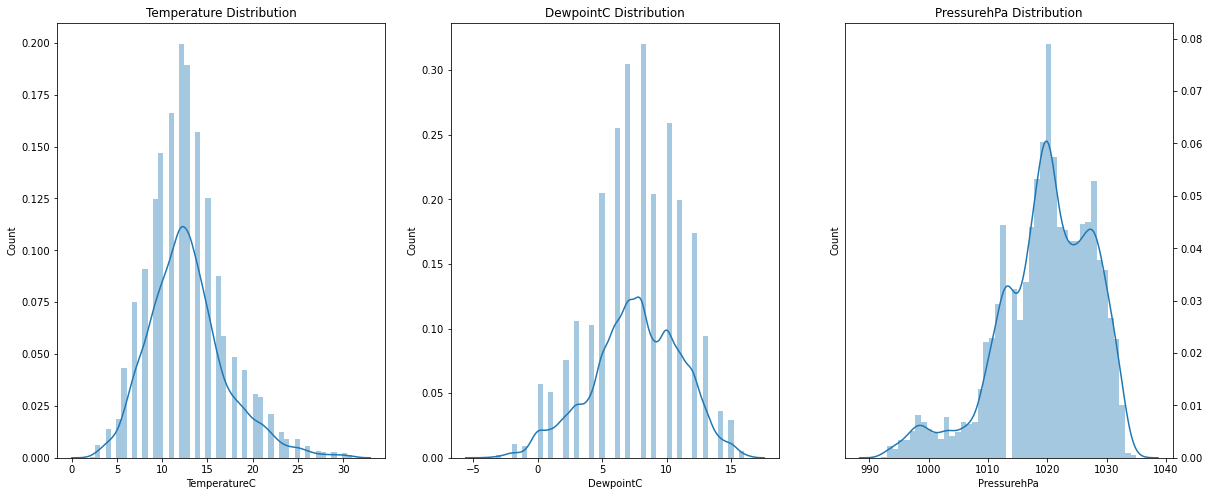

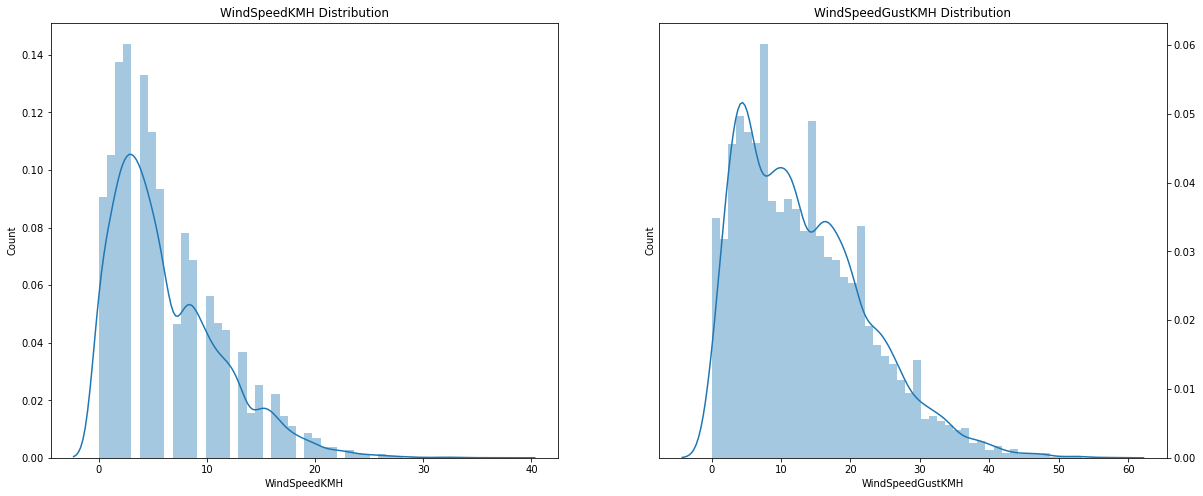

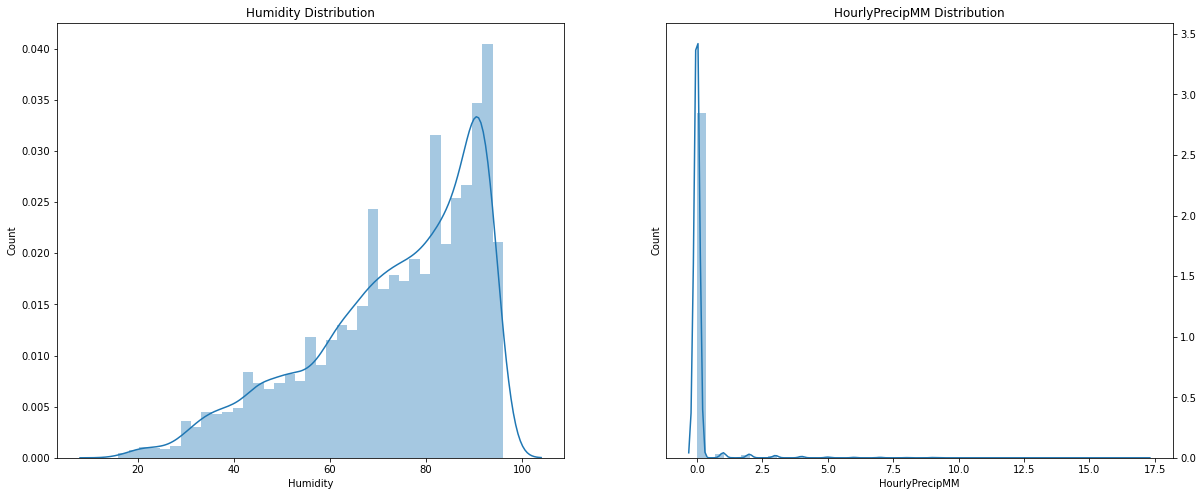

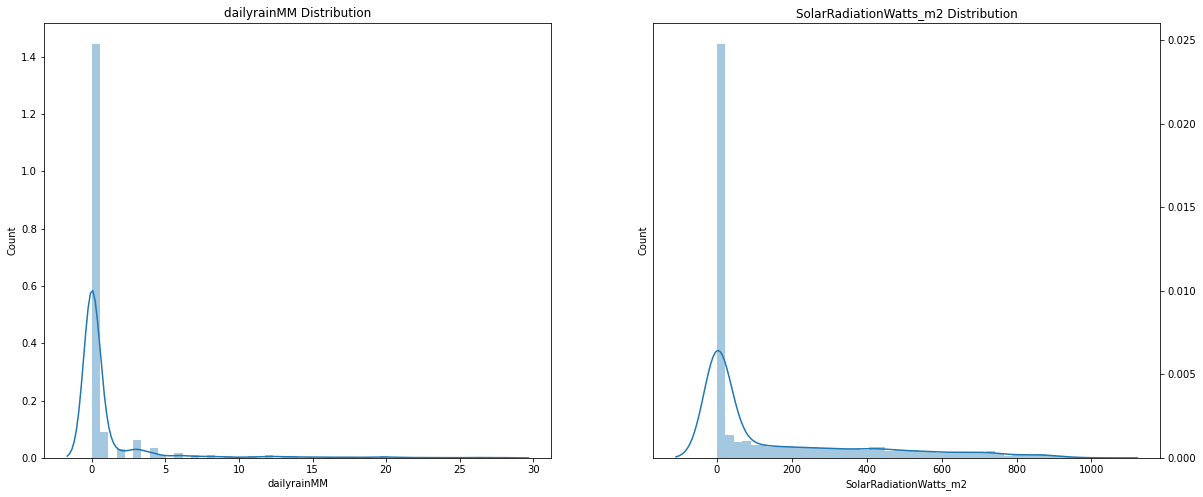

In [10]:
#plot 3 figures in a row
f, ax = plt.subplots(1,3, figsize=(20,8))
sns.distplot(df_weather_pre['TemperatureC'],ax=ax[0] )
ax[0].set_title('Temperature Distribution')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.distplot(df_weather_pre['DewpointC'],ax=ax[1] )
ax[1].set_title('DewpointC Distribution')
ax[1].set_ylabel('Count')

sns.distplot(df_weather_pre['PressurehPa'],ax=ax[2] )
ax[2].set_title('PressurehPa Distribution')
ax[2].set_ylabel('Count')
ax[2].yaxis.tick_right()


#plot 2 figures in a row
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df_weather_pre['WindSpeedKMH'],ax=ax[0] )
ax[0].set_title('WindSpeedKMH Distribution')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.distplot(df_weather_pre['WindSpeedGustKMH'],ax=ax[1] )
ax[1].set_title('WindSpeedGustKMH Distribution')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

#plot 2 figures in a row
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df_weather_pre['Humidity'],ax=ax[0] )
ax[0].set_title('Humidity Distribution')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.distplot(df_weather_pre['HourlyPrecipMM'],ax=ax[1] )
ax[1].set_title('HourlyPrecipMM Distribution')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()

#plot 2 figures in a row
f, ax = plt.subplots(1,2, figsize=(20,8))
sns.distplot(df_weather_pre['dailyrainMM'],ax=ax[0] )
ax[0].set_title('dailyrainMM Distribution')
ax[0].set_ylabel('Count')
ax[0].yaxis.tick_left()

sns.distplot(df_weather_pre['SolarRadiationWatts_m2'],ax=ax[1] )
ax[1].set_title('SolarRadiationWatts_m2 Distribution')
ax[1].set_ylabel('Count')
ax[1].yaxis.tick_right()



## Plot some data

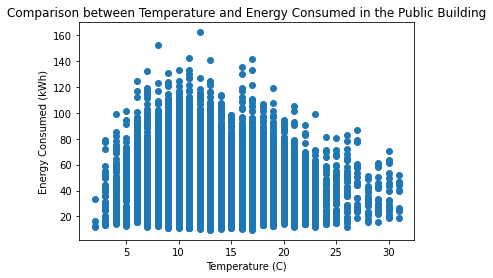

In [11]:
plt.scatter(df_weather['TemperatureC'], df_energy[0:df_weather['TemperatureC'].shape[0]])
plt.xlabel('Temperature (C)') 
plt.ylabel('Energy Consumed (kWh)')
plt.title('Comparison between Temperature and Energy Consumed in the Public Building')
plt.show()

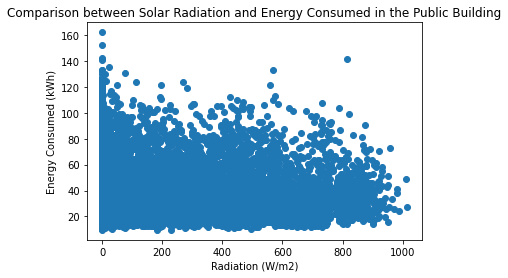

In [12]:
plt.scatter(df_weather['SolarRadiationWatts_m2'], df_energy[0:df_weather['TemperatureC'].shape[0]])
plt.xlabel('Radiation (W/m2)') 
plt.ylabel('Energy Consumed (kWh)')
plt.title('Comparison between Solar Radiation and Energy Consumed in the Public Building')
plt.show()

# Data preprocessing

## Data normalization

In [13]:
df_merged = pd.concat([df_weather, df_energy], axis=1)
df_merged.dropna(axis=0, inplace=True)
df_merged.reset_index(drop=True, inplace=True)
df_merged

,datetime,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,2019-01-01 00:15:00.000,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0,58.514142
1,2019-01-01 00:30:00.000,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0,57.575249
2,2019-01-01 00:45:00.000,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0,63.011688
3,2019-01-01 01:00:00.000,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0,62.735722
4,2019-01-01 01:15:00.000,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0,63.404029
...,...,...,...,...,...,...,...,...,...,...,...
12081,2019-05-17 23:00:00.000,12.0,8.0,1017.0,11.0,19.0,76.0,0.0,0.0,0.0,40.859362
12082,2019-05-17 23:15:00.000,12.0,8.0,1016.0,11.0,17.0,76.0,0.0,0.0,0.0,44.362400
12083,2019-05-17 23:30:00.000,12.0,8.0,1016.0,4.0,12.0,76.0,0.0,0.0,0.0,38.831422
12084,2019-05-17 23:45:00.000,12.0,8.0,1016.0,3.0,14.0,76.0,0.0,0.0,0.0,40.037862


In [14]:
df_merged.drop('datetime', axis=1, inplace=True)
df_merged

,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,8.0,4.0,1030.0,5.0,7.0,76.0,0.0,0.0,0.0,58.514142
1,8.0,4.0,1030.0,3.0,6.0,76.0,0.0,0.0,0.0,57.575249
2,8.0,4.0,1030.0,4.0,6.0,78.0,0.0,0.0,0.0,63.011688
3,8.0,4.0,1030.0,3.0,6.0,78.0,0.0,0.0,0.0,62.735722
4,8.0,4.0,1030.0,2.0,8.0,78.0,0.0,0.0,0.0,63.404029
...,...,...,...,...,...,...,...,...,...,...
12081,12.0,8.0,1017.0,11.0,19.0,76.0,0.0,0.0,0.0,40.859362
12082,12.0,8.0,1016.0,11.0,17.0,76.0,0.0,0.0,0.0,44.362400
12083,12.0,8.0,1016.0,4.0,12.0,76.0,0.0,0.0,0.0,38.831422
12084,12.0,8.0,1016.0,3.0,14.0,76.0,0.0,0.0,0.0,40.037862


In [15]:
#df_merged = pd.concat([df_weather, df_energy], axis=1)
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df_merged)
df_scaled = pd.DataFrame(df_scaled, columns=df_merged.columns)
df_scaled

,TemperatureC,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,HourlyPrecipMM,dailyrainMM,SolarRadiationWatts_m2,Energy
0,0.206897,0.4,0.883721,0.131579,0.120690,0.7500,0.0,0.0,0.0,0.320489
1,0.206897,0.4,0.883721,0.078947,0.103448,0.7500,0.0,0.0,0.0,0.314338
2,0.206897,0.4,0.883721,0.105263,0.103448,0.7750,0.0,0.0,0.0,0.349952
3,0.206897,0.4,0.883721,0.078947,0.103448,0.7750,0.0,0.0,0.0,0.348144
4,0.206897,0.4,0.883721,0.052632,0.137931,0.7750,0.0,0.0,0.0,0.352522
...,...,...,...,...,...,...,...,...,...,...
12081,0.344828,0.6,0.581395,0.289474,0.327586,0.7500,0.0,0.0,0.0,0.204834
12082,0.344828,0.6,0.558140,0.289474,0.293103,0.7500,0.0,0.0,0.0,0.227782
12083,0.344828,0.6,0.558140,0.105263,0.206897,0.7500,0.0,0.0,0.0,0.191549
12084,0.344828,0.6,0.558140,0.078947,0.241379,0.7500,0.0,0.0,0.0,0.199452


# Statistical analysis

## Correlation matrix

<AxesSubplot:>

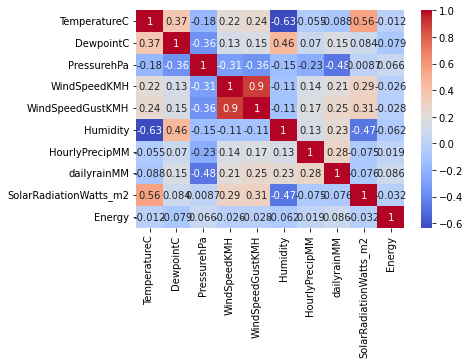

In [16]:
corr = df_scaled.corr()
sns.heatmap(corr,cmap='coolwarm',annot=True)

## Correlation matrix with output variable

In [17]:
cor_target = abs(corr["Energy"])

## Selecting highly correlated features

In [18]:
relevant_features = cor_target[cor_target>0.02]
df_select_scaled = df_scaled[list(relevant_features.keys())]
n_features = df_select_scaled.shape[1]
df_select_scaled

,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,dailyrainMM,SolarRadiationWatts_m2,Energy
0,0.4,0.883721,0.131579,0.120690,0.7500,0.0,0.0,0.320489
1,0.4,0.883721,0.078947,0.103448,0.7500,0.0,0.0,0.314338
2,0.4,0.883721,0.105263,0.103448,0.7750,0.0,0.0,0.349952
3,0.4,0.883721,0.078947,0.103448,0.7750,0.0,0.0,0.348144
4,0.4,0.883721,0.052632,0.137931,0.7750,0.0,0.0,0.352522
...,...,...,...,...,...,...,...,...
12081,0.6,0.581395,0.289474,0.327586,0.7500,0.0,0.0,0.204834
12082,0.6,0.558140,0.289474,0.293103,0.7500,0.0,0.0,0.227782
12083,0.6,0.558140,0.105263,0.206897,0.7500,0.0,0.0,0.191549
12084,0.6,0.558140,0.078947,0.241379,0.7500,0.0,0.0,0.199452


In [19]:
relevant_features = relevant_features.drop(["Energy"])
relevant_features

DewpointC                 0.079144
PressurehPa               0.065826
WindSpeedKMH              0.025917
WindSpeedGustKMH          0.027706
Humidity                  0.062428
dailyrainMM               0.086178
SolarRadiationWatts_m2    0.032013
Name: Energy, dtype: float64

## Feature selection

In [20]:
X = df_scaled[list(relevant_features.keys())]
#X = df_scaled.loc[:, ~df_scaled.columns.isin(['Energy'])]
y = df_scaled["Energy"]
X

,DewpointC,PressurehPa,WindSpeedKMH,WindSpeedGustKMH,Humidity,dailyrainMM,SolarRadiationWatts_m2
0,0.4,0.883721,0.131579,0.120690,0.7500,0.0,0.0
1,0.4,0.883721,0.078947,0.103448,0.7500,0.0,0.0
2,0.4,0.883721,0.105263,0.103448,0.7750,0.0,0.0
3,0.4,0.883721,0.078947,0.103448,0.7750,0.0,0.0
4,0.4,0.883721,0.052632,0.137931,0.7750,0.0,0.0
...,...,...,...,...,...,...,...
12081,0.6,0.581395,0.289474,0.327586,0.7500,0.0,0.0
12082,0.6,0.558140,0.289474,0.293103,0.7500,0.0,0.0
12083,0.6,0.558140,0.105263,0.206897,0.7500,0.0,0.0
12084,0.6,0.558140,0.078947,0.241379,0.7500,0.0,0.0


## Auxiliary functions

In [21]:
def build_model(X_train: np.array, y_train: np.array, X_test: np.array, algorithm):
    
    model = algorithm
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return model, preds

def plot_results(preds: np.array, actuals: np.array, title: str):
    
    plt.scatter(actuals, preds, c='b', label='predicted')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title(title)
    plt.xlim(0, plt.xlim()[1])
    plt.ylim(0, plt.ylim()[1])
    _ = plt.plot([0, 100], [0, 100], '--r', label='y=x')
    plt.legend()
    plt.show()
    
    
def performance_metrics(preds: np.array, actuals: np.array):

    # calculate performance metrics
    mse = mean_squared_error(actuals, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(actuals, preds)
    #wmape = np.sum(np.abs(preds - actuals)) / np.sum(np.abs(actuals)) * 100
    #mape = np.mean(np.abs((actuals - preds) / actuals)) * 100
    mape = np.round(mean_absolute_error(actuals, preds)/actuals.mean(), 2)
    
    r2 = r2_score(actuals, preds)

    # print performance metrics
    print('MSE: %.4f' % mse)
    print('RMSE: %.4f' % rmse)
    print('MAE: %.4f' % mae)
    print('MAPE: %.4f' % mape)
    print('R2: %.4f' % r2)
    return mse,rmse,mae,mape,r2

def select_best_params(X_train: np.array, y_train: np.array, X_test: np.array, algorithm, param_grid):
    model = GridSearchCV(algorithm, param_grid, cv=5)
    model.fit(X_train, y_train)
    best_params = model.best_params_
    preds = model.predict(X_test)

    return best_params, preds

def create_lstm_model(input_shape: tuple, units: int, dropout: float):
    model = Sequential()
    model.add(LSTM(units=units, input_shape=input_shape, dropout=dropout))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])
    return model

def prepare_dataset_lstm(tensor, n_lag_hours, n_features, train_size):
    
    values = tensor.values
    n_train_samples = int(len(values) * train_size)
    n_test_samples = int(len(values) - n_train_samples)

    #Extract training subset from values 
    train = values[:n_train_samples]

    #Extract test subset from values 
    test = values[n_train_samples:]

    # split into input and outputs
    n_obs = n_lag_hours * n_features
    train_X  = train[:,:-1]
    train_y = train[:,-1]
    test_X  = test[:,:-1] 
    test_y = test[:,-1]

    # reshape input to be 3D [samples, lag_hours, features]
    train_X = train_X.reshape(n_train_samples, n_lag_hours, n_features)
    test_X = test_X.reshape(n_test_samples, n_lag_hours, n_features)
    print(train_X.shape, train_y.shape)
    return train_X, test_X, train_y, test_y
    
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True): 
      
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)  #transforms data (pure matrix of values) into data structure adding index of rows and columns
    cols, names = list(), list()  #initialize empty lists 
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg

## Train and Predict Models

In [22]:
#Linear Regression
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X, y, test_size=0.2, random_state=42)
model_lr, preds_lr = build_model(X_train_lr, y_train_lr, X_test_lr, LinearRegression())

In [23]:
#LSTM
n_lag_hours = 3
tensor = series_to_supervised(df_select_scaled, n_in=n_lag_hours)
print(tensor)
#drop all but the var8 which is energy
tensor.drop(tensor.columns[[30,29,28,27,26,25,24]], axis=1, inplace=True)
print(tensor)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = prepare_dataset_lstm(tensor, n_lag_hours, n_features, 0.8)

       var1(t-3)  var2(t-3)  var3(t-3)  var4(t-3)  var5(t-3)  var6(t-3)  \
3            0.4   0.883721   0.131579   0.120690     0.7500        0.0   
4            0.4   0.883721   0.078947   0.103448     0.7500        0.0   
5            0.4   0.883721   0.105263   0.103448     0.7750        0.0   
6            0.4   0.883721   0.078947   0.103448     0.7750        0.0   
7            0.4   0.883721   0.052632   0.137931     0.7750        0.0   
...          ...        ...        ...        ...        ...        ...   
12081        0.6   0.581395   0.263158   0.327586     0.7375        0.0   
12082        0.6   0.558140   0.157895   0.379310     0.7375        0.0   
12083        0.6   0.558140   0.263158   0.362069     0.7500        0.0   
12084        0.6   0.581395   0.289474   0.327586     0.7500        0.0   
12085        0.6   0.558140   0.289474   0.293103     0.7500        0.0   

       var7(t-3)  var8(t-3)  var1(t-2)  var2(t-2)  ...  var7(t-1)  var8(t-1)  \
3            0.0   

In [24]:
model_lstm = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), 32, 0.2)
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=40, batch_size=2, validation_data=(X_test_lstm, y_test_lstm), verbose=2, shuffle=False)
preds_lstm = model_lstm.predict(X_test_lstm)

Epoch 1/40
4833/4833 - 17s - loss: 0.0122 - accuracy: 1.0346e-04 - val_loss: 0.0071 - val_accuracy: 4.1374e-04 - 17s/epoch - 4ms/step
Epoch 2/40
4833/4833 - 12s - loss: 0.0106 - accuracy: 1.0346e-04 - val_loss: 0.0063 - val_accuracy: 4.1374e-04 - 12s/epoch - 3ms/step
Epoch 3/40
4833/4833 - 16s - loss: 0.0097 - accuracy: 1.0346e-04 - val_loss: 0.0061 - val_accuracy: 4.1374e-04 - 16s/epoch - 3ms/step
Epoch 4/40
4833/4833 - 15s - loss: 0.0091 - accuracy: 0.0000e+00 - val_loss: 0.0060 - val_accuracy: 4.1374e-04 - 15s/epoch - 3ms/step
Epoch 5/40
4833/4833 - 13s - loss: 0.0086 - accuracy: 0.0000e+00 - val_loss: 0.0058 - val_accuracy: 4.1374e-04 - 13s/epoch - 3ms/step
Epoch 6/40
4833/4833 - 16s - loss: 0.0084 - accuracy: 1.0346e-04 - val_loss: 0.0060 - val_accuracy: 4.1374e-04 - 16s/epoch - 3ms/step
Epoch 7/40
4833/4833 - 16s - loss: 0.0082 - accuracy: 1.0346e-04 - val_loss: 0.0056 - val_accuracy: 4.1374e-04 - 16s/epoch - 3ms/step
Epoch 8/40
4833/4833 - 14s - loss: 0.0079 - accuracy: 1.0346e-

In [25]:
#XGBoost
X_train_xgb, X_test_xgb, y_train_xgb, y_test_xgb = train_test_split(X, y, test_size=0.2, random_state=42)
model_xgb, preds_xgb = build_model(X_train_xgb, y_train_xgb, X_test_xgb, xgb.XGBRegressor(verbosity=1, seed=42))

## Plot Models and Show Performance Metrics

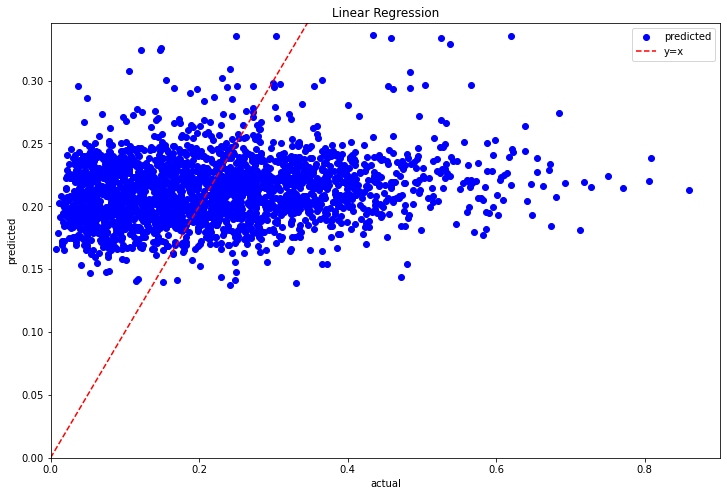

In [26]:
plt.figure(figsize=(12, 8))

plot_results(preds_lr, y_test_lr, 'Linear Regression')

In [27]:
print("Linear Regression Model")
lr_mse, lr_rmse, lr_mae, lr_mape, lr_r2 = performance_metrics(preds_lr, y_test_lr.values.reshape(-1))

Linear Regression Model
MSE: 0.0189
RMSE: 0.1375
MAE: 0.1097
MAPE: 0.5100
R2: 0.0358


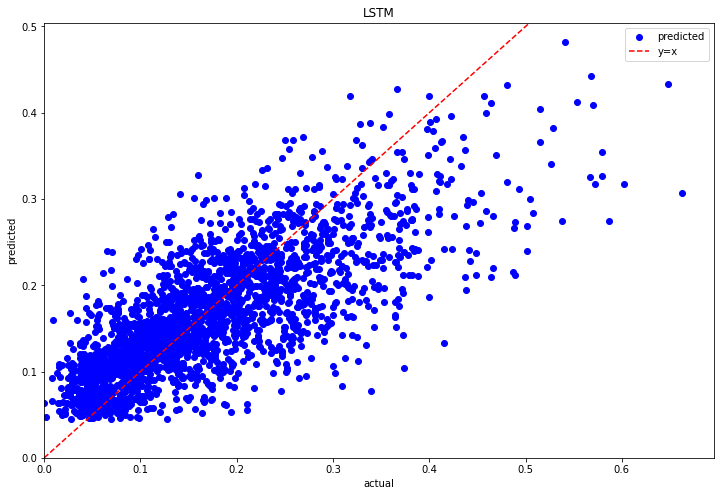

In [28]:
plt.figure(figsize=(12, 8))

plot_results(preds_lstm, y_test_lstm, 'LSTM')

In [29]:
print("LSTM Model")
lstm_mse, lstm_rmse, lstm_mae, lstm_mape, lstm_r2 = performance_metrics(preds_lstm, y_test_lstm.reshape(-1))

LSTM Model
MSE: 0.0045
RMSE: 0.0671
MAE: 0.0491
MAPE: 0.2900
R2: 0.5752


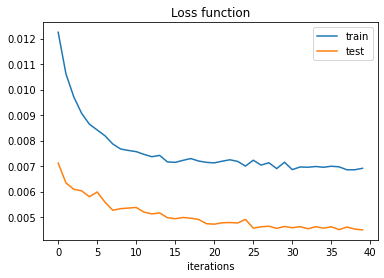

In [30]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss function')
plt.legend(['train', 'test'])
plt.xlabel('iterations')
plt.show()

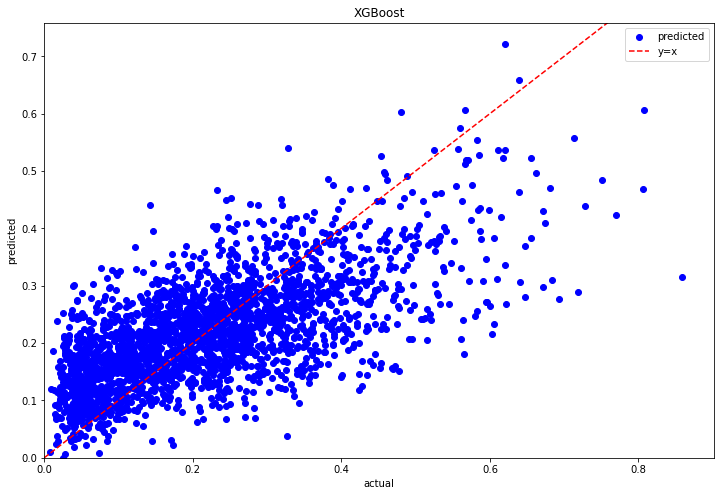

In [31]:
plt.figure(figsize=(12, 8))

plot_results(preds_xgb, y_test_xgb, 'XGBoost')

In [32]:
print("XGBoost Model")
xgb_mse, xgb_rmse, xgb_mae, xgb_mape, xgb_r2 = performance_metrics(preds_xgb, y_test_xgb.values.reshape(-1))

XGBoost Model
MSE: 0.0109
RMSE: 0.1046
MAE: 0.0810
MAPE: 0.3700
R2: 0.4426


## Cross Validation

In [33]:
def cv_validate(classifier, X, y, k):
    scores = cross_validate(classifier, X, y, cv=KFold(n_splits=k, shuffle=True), scoring='r2', return_estimator=True)
    print("R2: %0.2f +- %0.2f" % (scores['test_score'].mean(), scores['test_score'].std()))
    return scores

In [34]:
scores = cv_validate(LinearRegression(), X_train_lr, y_train_lr, 5)

R2: 0.03 +- 0.01


In [35]:
scores = cv_validate(xgb.XGBRegressor(verbosity=1, seed=42), X_train_xgb, y_train_xgb, 10)

R2: 0.40 +- 0.03


## Hyper-parameter tuning

### Linear Regression

In [36]:
param_grid_lr = {'normalize': [True, False], 'fit_intercept': [True, False] }
best_params_lr, preds_lr = select_best_params(X_train_lr, y_train_lr, X_test_lr, LinearRegression(), param_grid_lr)
best_params_lr

{'fit_intercept': True, 'normalize': True}

In [37]:
model_lr_hyp, preds_lr_hyp = build_model(X_train_lr, y_train_lr, X_test_lr, LinearRegression(fit_intercept=best_params_lr['fit_intercept'], normalize=best_params_lr['normalize']))

### LSTM

In [38]:
model_lstm = KerasClassifier(build_fn=create_lstm_model, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), verbose=0)
param_grid_lstm = {'units': [32, 64, 128], 'dropout': [0.2, 0.5]}
grid_search_lstm = GridSearchCV(estimator=model_lstm, param_grid=param_grid_lstm, cv=5)
grid_search_lstm.fit(X_train_lstm, y_train_lstm)
best_params_lstm = grid_search_lstm.best_params_
preds_lstm = grid_search_lstm.predict(X_test_lstm)
best_params_lstm

76/76 [==============================] - 1s 3ms/step


{'dropout': 0.2, 'units': 32}

In [39]:
model_lstm_hyp = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), best_params_lstm['units'], best_params_lstm['dropout'])
model_lstm_hyp.fit(X_train_lstm, y_train_lstm, epochs=40, batch_size=2, verbose=1)
preds_lstm_hyp = model_lstm_hyp.predict(X_test_lstm)

Epoch 1/40
4833/4833 [==============================] - 21s 3ms/step - loss: 0.0117 - accuracy: 0.0000e+00
Epoch 2/40
4833/4833 [==============================] - 16s 3ms/step - loss: 0.0101 - accuracy: 1.0346e-04
Epoch 3/40
4833/4833 [==============================] - 16s 3ms/step - loss: 0.0095 - accuracy: 1.0346e-04
Epoch 4/40
4833/4833 [==============================] - 14s 3ms/step - loss: 0.0090 - accuracy: 1.0346e-04
Epoch 5/40
4833/4833 [==============================] - 13s 3ms/step - loss: 0.0084 - accuracy: 1.0346e-04
Epoch 6/40
4833/4833 [==============================] - 13s 3ms/step - loss: 0.0081 - accuracy: 1.0346e-04
Epoch 7/40
4833/4833 [==============================] - 12s 3ms/step - loss: 0.0079 - accuracy: 1.0346e-04
Epoch 8/40
4833/4833 [==============================] - 18s 4ms/step - loss: 0.0076 - accuracy: 0.0000e+00
Epoch 9/40
4833/4833 [==============================] - 16s 3ms/step - loss: 0.0076 - accuracy: 1.0346e-04
Epoch 10/40
4833/4833 [==============

### XGBoost 

In [ ]:
param_grid_xgb = {'max_depth': [3, 5, 7], 'learning_rate': [0.1, 0.2, 0.3], 'n_estimators': [50, 100, 150]}
best_params_xgb, preds_xgb = select_best_params(X_train_xgb, y_train_xgb, X_test_xgb, xgb.XGBRegressor(), param_grid_xgb)
best_params_xgb

In [ ]:
model_xgb_hyp, preds_xgb_hyp = build_model(X_train_xgb, y_train_xgb, X_test_xgb, xgb.XGBRegressor(max_depth=best_params_xgb['max_depth'], learning_rate=best_params_xgb['learning_rate'], n_estimators=best_params_xgb['n_estimators'], verbosity=1, seed=42))

In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_lr_hyp, y_test_lr, 'Linear Regression')

print("Linear Regression Model")
lr_mse_hyp, lr_rmse_hyp, lr_mae_hyp, lr_mape_hyp, lr_r2_hyp = performance_metrics(preds_lr_hyp, y_test_lr.values.reshape(-1))

plt.figure(figsize=(12, 8))

plot_results(preds_lstm_hyp, y_test_lstm, 'LSTM')

print("LSTM Model")
lstm_mse_hyp, lstm_rmse_hyp, lstm_mae_hyp, lstm_mape_hyp, lstm_r2_hyp = performance_metrics(preds_lstm_hyp, y_test_lstm.reshape(-1))

plt.figure(figsize=(12, 8))

plot_results(preds_xgb_hyp, y_test_xgb, 'XGBoost')

print("XGBoost Model")
xgb_mse_hyp, xgb_rmse_hyp, xgb_mae_hyp, xgb_mape_hyp, xgb_r2_hyp = performance_metrics(preds_xgb_hyp, y_test_xgb.values.reshape(-1))

## Results Comparison

### Difference between HyperParameter Results and Standard Results

### Linear Regression

In [ ]:
print("Differences after hyper-parameterize")
print("MSE: {}".format(lr_mse_hyp-lr_mse))
print("RMSE: {}".format(lr_rmse_hyp-lr_rmse))
print("MAE: {}".format(lr_mae_hyp-lr_mae))
print("MAPE: {}".format(lr_mape_hyp-lr_mape))
print("R2: {}".format((lr_r2_hyp-lr_r2)*100))

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
dist1_lr = {'mse': lr_mse, 'rmse': lr_rmse, 'mae': lr_mae, 'mape': lr_mape, 'r2': lr_r2}
lr_names = list(dist1_lr.keys())
lr_values = list(dist1_lr.values())
axs[0].bar(lr_names, lr_values)
axs[0].set_title("Linear Regression")
axs[0].set_ylim(0,0.7)
dist2_lr = {'mse': lr_mse_hyp, 'rmse': lr_rmse_hyp, 'mae': lr_mae_hyp, 'mape': lr_mape_hyp, 'r2': lr_r2_hyp}
lr_names_hyp = list(dist2_lr.keys())
lr_values_hyp = list(dist2_lr.values())
axs[1].bar(lr_names_hyp, lr_values_hyp)
axs[1].set_title("Linear Regression after Hyper")
axs[1].set_ylim(0,0.7)

### LSTM

In [ ]:
print("Differences after hyper-parameterize")
print("MSE: {}".format(lstm_mse_hyp-lstm_mse))
print("RMSE: {}".format(lstm_rmse_hyp-lstm_rmse))
print("MAE: {}".format(lstm_mae_hyp-lstm_mae))
print("MAPE: {}".format(lstm_mape_hyp-lstm_mape))
print("R2: {}".format((lstm_r2_hyp-lstm_r2)*100))

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
dist1_lstm = {'mse': lstm_mse, 'rmse': lstm_rmse, 'mae': lstm_mae, 'mape': lstm_mape, 'r2': lstm_r2}
lstm_names = list(dist1_lstm.keys())
lstm_values = list(dist1_lstm.values())
axs[0].bar(lstm_names, lstm_values)
axs[0].set_title("LSTM")
axs[0].set_ylim(0,0.7)
dist2_lstm = {'mse': lstm_mse_hyp, 'rmse': lstm_rmse_hyp, 'mae': lstm_mae_hyp, 'mape': lstm_mape_hyp, 'r2': lstm_r2_hyp}
lstm_names_hyp = list(dist2_lstm.keys())
lstm_values_hyp = list(dist2_lstm.values())
axs[1].bar(lstm_names_hyp, lstm_values_hyp)
axs[1].set_title("LSTM after Hyper")
axs[1].set_ylim(0,0.7)

### XGBoost

In [ ]:
print("Differences after hyper-parameterize")
print("MSE: {}".format(xgb_mse_hyp-xgb_mse))
print("RMSE: {}".format(xgb_rmse_hyp-xgb_rmse))
print("MAE: {}".format(xgb_mae_hyp-xgb_mae))
print("MAPE: {}".format(xgb_mape_hyp-xgb_mape))
print("R2: {}".format((xgb_r2_hyp-xgb_r2)*100))

In [ ]:
fig, axs = plt.subplots(1, 2, sharey=False, tight_layout=True)
dist1_xgb = {'mse': xgb_mse, 'rmse': xgb_rmse, 'mae': xgb_mae, 'mape': xgb_mape, 'r2': xgb_r2}
xgb_names = list(dist1_xgb.keys())
xgb_values = list(dist1_xgb.values())
axs[0].bar(xgb_names, xgb_values)
axs[0].set_title("XGBoost")
axs[0].set_ylim(0,0.7)
dist2_xgb = {'mse': xgb_mse_hyp, 'rmse': xgb_rmse_hyp, 'mae': xgb_mae_hyp, 'mape': xgb_mape_hyp, 'r2': xgb_r2_hyp}
xgb_names_hyp = list(dist2_xgb.keys())
xgb_values_hyp = list(dist2_xgb.values())
axs[1].bar(xgb_names_hyp, xgb_values_hyp)
axs[1].set_title("XGBoost after Hyper")
axs[1].set_ylim(0,0.7)

## LSTM New Runs

### 10 lag hours

In [ ]:
n_lag_hours = 10
tensor = series_to_supervised(df_select_scaled, n_in=n_lag_hours)
print(tensor)
#drop all but the var8 which is energy
tensor.drop(tensor.columns[[86,85,84,83,82,81,80]], axis=1, inplace=True)
print(tensor)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = prepare_dataset_lstm(tensor, n_lag_hours, n_features, 0.8)

In [ ]:
model_lstm = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), best_params_lstm['units'], best_params_lstm['dropout'])
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=40, batch_size=2, validation_data=(X_test_lstm, y_test_lstm), verbose=2, shuffle=False)
preds_lstm = model_lstm.predict(X_test_lstm)

In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_lstm, y_test_lstm, 'LSTM')

print("LSTM Model 10 timesteps")
lstm_mse_10, lstm_rmse_10, lstm_mae_10, lstm_mape_10, lstm_r2_10 = performance_metrics(preds_lstm, y_test_lstm.reshape(-1))

### 3 lag hours, 0.2 train size

In [ ]:
n_lag_hours = 3
tensor = series_to_supervised(df_select_scaled, n_in=n_lag_hours)
print(tensor)
#drop all but the var8 which is energy
tensor.drop(tensor.columns[[30,29,28,27,26,25,24]], axis=1, inplace=True)
print(tensor)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = prepare_dataset_lstm(tensor, n_lag_hours, n_features, 0.2)

In [ ]:
model_lstm = create_lstm_model((X_train_lstm.shape[1], X_train_lstm.shape[2]), best_params_lstm['units'], best_params_lstm['dropout'])
history = model_lstm.fit(X_train_lstm, y_train_lstm, epochs=40, batch_size=2, validation_data=(X_test_lstm, y_test_lstm), verbose=2, shuffle=False)
preds_lstm = model_lstm.predict(X_test_lstm)

In [ ]:
plt.figure(figsize=(12, 8))

plot_results(preds_lstm, y_test_lstm, 'LSTM')

print("LSTM Model 20% Train Size")
lstm_mse_less_train, lstm_rmse_less_train, lstm_mae_less_train, lstm_mape_less_train, lstm_r2_less_train = performance_metrics(preds_lstm, y_test_lstm.reshape(-1))

In [ ]:
fig, axs = plt.subplots(1, 3, sharey=False, tight_layout=True, figsize=(10, 6))
dist1_lstm = {'mse': lstm_mse, 'rmse': lstm_rmse, 'mae': lstm_mae, 'mape': lstm_mape, 'r2': lstm_r2}
lstm_names = list(dist1_lstm.keys())
lstm_values = list(dist1_lstm.values())
axs[0].bar(lstm_names, lstm_values)
axs[0].set_title("LSTM 3 lag hours, 80% train size")
axs[0].set_ylim(0,0.7)
dist2_lstm = {'mse': lstm_mse_10, 'rmse': lstm_rmse_10, 'mae': lstm_mae_10, 'mape': lstm_mape_10, 'r2': lstm_r2_10}
lstm_names_10 = list(dist2_lstm.keys())
lstm_values_10 = list(dist2_lstm.values())
axs[1].bar(lstm_names_10, lstm_values_10)
axs[1].set_title("LSTM 10 lag hours, 80% train size")
axs[1].set_ylim(0,0.7)
dist3_lstm = {'mse': lstm_mse_less_train, 'rmse': lstm_rmse_less_train, 'mae': lstm_mae_less_train, 'mape': lstm_mape_less_train, 'r2': lstm_r2_less_train}
lstm_names_less_train = list(dist3_lstm.keys())
lstm_values_less_train = list(dist3_lstm.values())
axs[2].bar(lstm_names_less_train, lstm_values_less_train)
axs[2].set_title("LSTM 3 lag hours, 20% train size")
axs[2].set_ylim(0,0.7)

## Final Comparison

In [ ]:
### LR

fig, axs = plt.subplots(3, 2, sharey=False, tight_layout=True, figsize=(12,12))
dist1_lr = {'mse': lr_mse, 'rmse': lr_rmse, 'mae': lr_mae, 'mape': lr_mape, 'r2': lr_r2}
lr_names = list(dist1_lr.keys())
lr_values = list(dist1_lr.values())
axs[0,0].bar(lr_names, lr_values)
axs[0,0].set_title("Linear Regression")
axs[0,0].set_ylim(0,0.7)
dist2_lr = {'mse': lr_mse_hyp, 'rmse': lr_rmse_hyp, 'mae': lr_mae_hyp, 'mape': lr_mape_hyp, 'r2': lr_r2_hyp}
lr_names_hyp = list(dist2_lr.keys())
lr_values_hyp = list(dist2_lr.values())
axs[0,1].bar(lr_names_hyp, lr_values_hyp)
axs[0,1].set_title("Linear Regression after Hyper")
axs[0,1].set_ylim(0,0.7)

### LSTM

dist1_lstm = {'mse': lstm_mse, 'rmse': lstm_rmse, 'mae': lstm_mae, 'mape': lstm_mape, 'r2': lstm_r2}
lstm_names = list(dist1_lstm.keys())
lstm_values = list(dist1_lstm.values())
axs[1,0].bar(lstm_names, lstm_values)
axs[1,0].set_title("LSTM")
axs[1,0].set_ylim(0,0.7)
dist2_lstm = {'mse': lstm_mse_hyp, 'rmse': lstm_rmse_hyp, 'mae': lstm_mae_hyp, 'mape': lstm_mape_hyp, 'r2': lstm_r2_hyp}
lstm_names_hyp = list(dist2_lstm.keys())
lstm_values_hyp = list(dist2_lstm.values())
axs[1,1].bar(lstm_names_hyp, lstm_values_hyp)
axs[1,1].set_title("LSTM after Hyper")
axs[1,1].set_ylim(0,0.7)

### XGBoost

dist1_xgb = {'mse': xgb_mse, 'rmse': xgb_rmse, 'mae': xgb_mae, 'mape': xgb_mape, 'r2': xgb_r2}
xgb_names = list(dist1_xgb.keys())
xgb_values = list(dist1_xgb.values())
axs[2,0].bar(xgb_names, xgb_values)
axs[2,0].set_title("XGBoost")
axs[2,0].set_ylim(0,0.7)
dist2_xgb = {'mse': xgb_mse_hyp, 'rmse': xgb_rmse_hyp, 'mae': xgb_mae_hyp, 'mape': xgb_mape_hyp, 'r2': xgb_r2_hyp}
xgb_names_hyp = list(dist2_xgb.keys())
xgb_values_hyp = list(dist2_xgb.values())
axs[2,1].bar(xgb_names_hyp, xgb_values_hyp)
axs[2,1].set_title("XGBoost after Hyper")
axs[2,1].set_ylim(0,0.7)